**Nome dos integrantes:**
Karen Almeida;
Ricardo Steigleder;
Rhayza Pinto;



**Curso:** Ciência de Dados


**Instituição:** ADA TECH | Santander Corders.


**Descrição:**
Neste projeto, conduziremos uma análise exploratória de datasets com índices de felicidade mundial e de taxas de suicídio, relacionando-os, utilizando conjuntos de dados disponíveis em formato CSV encontrados na plataforma Kaggle.


**Dataset:**
Para este projeto, optamos por utilizar conjuntos de dados diferentes, cada um contendo informações sobre a felicidade e sobre as taxas de suicídio a nível global. Essa abordagem nos permitiu uma análise mais ampla, possibilitando uma compreensão mais completa das tendências e dos fatores que se relacionam com esses temas. Para facilitar a visualização dos dados, realizamos a concatenação desses conjuntos de dados.


**Metodologia:**
Iniciaremos com a preparação dos dados, seguida pela aplicação de técnicas de análise exploratória (EDA). Nosso objetivo é identificar padrões e relações entre os níveis de felicidade, e as taxas de suicídio em diferentes localidades do mundo. A análise incluirá fatores como indicadores econômicos, sociais, culturais e de saúde que podem influenciar essas tendencias. Esta análise permite uma visão mais aprofundada sobre como a felicidade e o suicídio estão interligados.


**Resultados:**
Ao final desta análise, teremos uma compreensão mais profunda das relações entre felicidade e suicídio em escala global. Isso nos permitirá identificar fatores que podem influenciar o bem-estar emocional das populações, fornecer insights valiosos para futuras pesquisas e políticas de promoção da saúde mental e bem-estar sociocultural.


##IMPORTANDO BIBLIOTECAS

In [ ]:
# importando bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import plotly.express as px
import matplotlib.pyplot as plt
import re # corrigir dados dos suicidios
from wordcloud import WordCloud

##CONECTANDO AO DRIVE

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# ANALISANDO E NORMALIZANDO DADOS FELICIDADE

In [ ]:
#Importando dataframe felicidade
dados = pd.read_csv("/content/happiness.csv")
happiness = pd.DataFrame(dados)
happiness


,Country,Year,Overall rank,Score,GDP per capita,Family,Healthy life expectancy,Freedom,Perceptions of corruption,Generosity
0,Afghanistan,2015,153,3.575,0.319820,0.302850,0.303350,0.234140,0.097190,0.365100
1,Afghanistan,2016,154,3.360,0.382270,0.110370,0.173440,0.164300,0.071120,0.312680
2,Afghanistan,2017,141,3.794,0.401477,0.581543,0.180747,0.106180,0.061158,0.311871
3,Afghanistan,2018,145,3.632,0.332000,0.537000,0.255000,0.085000,0.036000,0.191000
4,Afghanistan,2019,154,3.203,0.350000,0.517000,0.361000,0.000000,0.025000,0.158000
...,...,...,...,...,...,...,...,...,...,...
690,Zimbabwe,2015,115,4.610,0.271000,1.032760,0.334750,0.258610,0.080790,0.189870
691,Zimbabwe,2016,131,4.193,0.350410,0.714780,0.159500,0.254290,0.085820,0.185030
692,Zimbabwe,2017,138,3.875,0.375847,1.083096,0.196764,0.336384,0.095375,0.189143
693,Zimbabwe,2018,144,3.692,0.357000,1.094000,0.248000,0.406000,0.099000,0.132000


In [ ]:
# Verificando Quantidades de linhas e colunas do DF happiness
happiness.shape

(695, 10)

In [ ]:
# Verificando detalhes do DF happyness
happiness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 695 entries, 0 to 694
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Country                    695 non-null    object 
 1   Year                       695 non-null    int64  
 2   Overall rank               695 non-null    int64  
 3   Score                      695 non-null    float64
 4   GDP per capita             695 non-null    float64
 5   Family                     695 non-null    float64
 6   Healthy life expectancy    695 non-null    float64
 7   Freedom                    695 non-null    float64
 8   Perceptions of corruption  694 non-null    float64
 9   Generosity                 695 non-null    float64
dtypes: float64(7), int64(2), object(1)
memory usage: 54.4+ KB


In [ ]:
# Verificando se há dados nulos e sua porcentagem se comparado ao DF inteiro
happiness.isnull().sum()/happiness.shape[0]

Country                      0.000000
Year                         0.000000
Overall rank                 0.000000
Score                        0.000000
GDP per capita               0.000000
Family                       0.000000
Healthy life expectancy      0.000000
Freedom                      0.000000
Perceptions of corruption    0.001439
Generosity                   0.000000
dtype: float64

In [ ]:
#calculando estatísticas descritivas do DF happiness
happiness.describe()

,Year,Overall rank,Score,GDP per capita,Family,Healthy life expectancy,Freedom,Perceptions of corruption,Generosity
count,695.000000,695.000000,695.000000,695.000000,695.000000,695.000000,695.000000,694.000000,695.000000
mean,2017.000000,75.863309,5.450124,0.945554,1.098583,0.635084,0.417321,0.124280,0.219079
std,1.415232,45.271102,1.129846,0.392372,0.324918,0.232151,0.148790,0.107785,0.125419
min,2015.000000,1.000000,2.839000,0.015300,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2016.000000,36.500000,4.556000,0.655675,0.885940,0.500632,0.317555,0.052000,0.130000
50%,2017.000000,74.000000,5.425000,1.009850,1.145240,0.669260,0.434500,0.088507,0.201313
75%,2018.000000,115.000000,6.301000,1.247430,1.360790,0.811800,0.535500,0.154338,0.283335
max,2019.000000,158.000000,7.769000,2.096000,1.644000,1.141000,0.724000,0.551910,0.838075


# ANALISANDO E NORMALIZANDO DADOS SUICIDIO


In [ ]:
# Imporando o dataframe dos suicidios
dados = pd.read_csv("/content/suicide.csv")
suicide = pd.DataFrame(dados)
suicide.head()

,Country,Year,Probability (%) for both genres dying at 30-70 of natural causes,Probability (%) for men dying at 30-70 of natural causes,Probability (%) for women dying at 30-70 of natural causes,Suicide rates (per 100 000 population) for both genres,Suicide rates (per 100 000 population) for men,Suicide rates (per 100 000 population) for women
0,Afghanistan,2019,35.3 [21.8-49.8],34.4 [21.9-47.9],36.2 [21.7-51.6],4.1 [2.3-7.0],4.6 [2.6-7.9],3.6 [2.0-5.9]
1,Afghanistan,2018,35.4 [21.7-50.1],34.7 [22.0-48.5],36.0 [21.4-51.6],4.1 [2.3-6.8],4.6 [2.6-7.8],3.5 [2.0-5.8]
2,Afghanistan,2017,35.5 [21.7-50.4],35.0 [22.0-49.1],35.9 [21.3-51.7],4.1 [2.3-6.8],4.6 [2.7-7.9],3.4 [2.0-5.7]
3,Afghanistan,2016,35.6 [21.6-50.7],35.1 [22.0-49.4],36.0 [21.2-51.9],4.0 [2.3-6.7],4.4 [2.6-7.4],3.6 [2.1-5.9]
4,Afghanistan,2015,35.6 [21.6-50.8],35.4 [22.3-49.8],35.7 [21.0-51.7],4.0 [2.3-6.6],4.3 [2.5-7.3],3.6 [2.0-5.9]


In [ ]:
# Função para extrair os números antes dos colchetes usando regex
def extract_numbers(text):
    numbers = re.findall(r'\d+\.\d+', text)
    return float(numbers[0]) if numbers else None

# Aplicandoa função a todas as colunas do DataFrame, para deizar somente numeros sem caracteres especiais
suicide['Probability (%) for both genres dying at 30-70 of natural causes'] = suicide['Probability (%) for both genres dying at 30-70 of natural causes'].apply(extract_numbers)
suicide['Probability (%) for men dying at 30-70 of natural causes'] = suicide['Probability (%) for men dying at 30-70 of natural causes'].apply(extract_numbers)
suicide['Probability (%) for women dying at 30-70 of natural causes'] = suicide['Probability (%) for women dying at 30-70 of natural causes'].apply(extract_numbers)
suicide['Suicide rates (per 100 000 population) for both genres'] = suicide['Suicide rates (per 100 000 population) for both genres'].apply(extract_numbers)
suicide['Suicide rates (per 100 000 population) for men'] = suicide['Suicide rates (per 100 000 population) for men'].apply(extract_numbers)
suicide['Suicide rates (per 100 000 population) for women'] = suicide['Suicide rates (per 100 000 population) for women'].apply(extract_numbers)

suicide

,Country,Year,Probability (%) for both genres dying at 30-70 of natural causes,Probability (%) for men dying at 30-70 of natural causes,Probability (%) for women dying at 30-70 of natural causes,Suicide rates (per 100 000 population) for both genres,Suicide rates (per 100 000 population) for men,Suicide rates (per 100 000 population) for women
0,Afghanistan,2019,35.3,34.4,36.2,4.1,4.6,3.6
1,Afghanistan,2018,35.4,34.7,36.0,4.1,4.6,3.5
2,Afghanistan,2017,35.5,35.0,35.9,4.1,4.6,3.4
3,Afghanistan,2016,35.6,35.1,36.0,4.0,4.4,3.6
4,Afghanistan,2015,35.6,35.4,35.7,4.0,4.3,3.6
...,...,...,...,...,...,...,...,...
695,Zimbabwe,2019,28.4,30.3,27.1,14.1,20.0,8.8
696,Zimbabwe,2018,28.5,30.3,27.4,14.0,19.9,8.7
697,Zimbabwe,2017,29.3,30.9,28.3,15.0,21.0,9.6
698,Zimbabwe,2016,30.4,31.8,29.5,16.8,22.5,11.6


In [ ]:
# Verificando Quantidades de linhas e colunas do DF suicide
suicide.shape

(700, 8)

In [ ]:
# Verificando detalhes do DF suicide
suicide.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 8 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Country                                                           700 non-null    object 
 1   Year                                                              700 non-null    int64  
 2   Probability (%) for both genres dying at 30-70 of natural causes  700 non-null    float64
 3   Probability (%) for men dying at 30-70 of natural causes          700 non-null    float64
 4   Probability (%) for women dying at 30-70 of natural causes        700 non-null    float64
 5   Suicide rates (per 100 000 population) for both genres            700 non-null    float64
 6   Suicide rates (per 100 000 population) for men                    700 non-null    float64
 7   Suicide rates (per 100 000 populatio

In [ ]:
# Verificando se há dados nulos e sua porcentagem se comparado ao DF inteiro
suicide.isnull().sum()/suicide.shape[0]

Country                                                             0.0
Year                                                                0.0
Probability (%) for both genres dying at 30-70 of natural causes    0.0
Probability (%) for men dying at 30-70 of natural causes            0.0
Probability (%) for women dying at 30-70 of natural causes          0.0
Suicide rates (per 100 000 population) for both genres              0.0
Suicide rates (per 100 000 population) for men                      0.0
Suicide rates (per 100 000 population) for women                    0.0
dtype: float64

In [ ]:
#calculando estatísticas descritivas do DF suicide
suicide.describe()

,Year,Probability (%) for both genres dying at 30-70 of natural causes,Probability (%) for men dying at 30-70 of natural causes,Probability (%) for women dying at 30-70 of natural causes,Suicide rates (per 100 000 population) for both genres,Suicide rates (per 100 000 population) for men,Suicide rates (per 100 000 population) for women
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,2017.000000,18.505857,21.841714,15.389857,9.213857,14.174143,4.411714
std,1.415225,6.468777,7.886449,6.216522,5.952523,9.942664,2.857564
min,2015.000000,7.300000,9.600000,4.400000,0.600000,0.400000,0.700000
25%,2016.000000,12.100000,15.200000,9.675000,5.100000,7.300000,2.275000
50%,2017.000000,18.500000,21.150000,15.500000,7.800000,11.600000,3.500000
75%,2018.000000,23.525000,28.300000,19.800000,12.100000,18.025000,6.300000
max,2019.000000,36.100000,46.200000,36.200000,34.900000,61.700000,16.900000


#ANALISE DE AMBOS DATAFRAMES E SUAS POSSIVEIS CORRELAÇÕES.

In [ ]:
# Verificando colunas do DF suicide
suicide.columns

Index(['Country', 'Year',
       'Probability (%) for both genres dying at 30-70 of natural causes',
       'Probability (%) for men dying at 30-70 of natural causes',
       'Probability (%) for women dying at 30-70 of natural causes',
       'Suicide rates (per 100 000 population) for both genres',
       'Suicide rates (per 100 000 population) for men',
       'Suicide rates (per 100 000 population) for women'],
      dtype='object')

In [ ]:
# Verificando colunas do DF Happiness
happiness.columns

Index(['Country', 'Year', 'Overall rank', 'Score', 'GDP per capita', 'Family',
       'Healthy life expectancy', 'Freedom', 'Perceptions of corruption',
       'Generosity'],
      dtype='object')

In [ ]:
# Obtem a média de suicídios mundial por ano
suicide_media_mundial_ano = suicide.groupby('Year')['Suicide rates (per 100 000 population) for both genres'].mean()
suicide_media_mundial_ano = suicide_media_mundial_ano.to_dict()
suicide_media_mundial_ano

{2015: 9.590714285714286,
 2016: 9.347142857142856,
 2017: 9.145714285714286,
 2018: 9.04642857142857,
 2019: 8.939285714285715}

In [ ]:
# Categoriza com base na média do ano, com tolerância de 10% quando próximo a média.
def categoria (rate, media):
    tolerancia = 0.1*media
    if rate < (media - tolerancia):
        return 'Abaixo da Média'
    elif (media - tolerancia) <= rate <= (media + tolerancia):
        return 'Próximo da Média'
    else:
        return 'Acima da Média'

In [ ]:
#o código itera por meio de um dicionário de anos e médias e, para cada ano, calcula uma categoria com base nos valores dE UMA coluna
#específica do DF, e a média associada a esse ano. Os resultados são armazenados na coluna 'Faixa'
for ano, media in suicide_media_mundial_ano.items():
    suicide.loc[suicide['Year'] == ano, 'Faixa'] = suicide.loc[suicide['Year'] == ano, 'Suicide rates (per 100 000 population) for both genres'].apply(lambda x: categoria(x, media))

In [ ]:
# Criando um mapa de calor geoespacial usando Plotly Express
fig = px.choropleth(suicide.loc[suicide['Year'] == 2015],
                    locations='Country',
                    locationmode='country names',
                    color='Faixa',
                    hover_name='Country',
                    color_discrete_sequence=['#2ecc71', '#ff5733', '#f5be41'],  # Cores para categorias
                    labels={'Suicide rates (per 100 000 population) for both genres': 'Taxa de Suicídio'},
                    title='Taxa de Suicídio (Ambos os Sexos) por País - 2015',
                    projection='natural earth')

# Exiba o mapa
fig.show()

In [ ]:
# Obtem a média da pontuação de felicidade mundial por ano

happiness_media_mundial_ano = happiness.groupby('Year')['Score'].mean()
happiness_media_mundial_ano = happiness_media_mundial_ano.to_dict()
happiness_media_mundial_ano

{2015: 5.42958273381295,
 2016: 5.422503597122302,
 2017: 5.4337194240350515,
 2018: 5.462086330935252,
 2019: 5.5027266187050365}

In [ ]:
#itera por meio de um dicionário de anos e médias e, para cada ano, calcula uma categoria com base nos valores da coluna Score
#e na media associada a esse ano.
for ano, media in happiness_media_mundial_ano.items():
    happiness.loc[happiness['Year'] == ano, 'Faixa'] = happiness.loc[happiness['Year'] == ano, 'Score'].apply(lambda x: categoria(x, media))

In [ ]:
# Criando um mapa de calor geoespacial usando Plotly Express
fig = px.choropleth(happiness.loc[happiness['Year'] == 2015],
                    locations='Country',
                    locationmode='country names',
                    color='Faixa',
                    hover_name='Country',
                    color_discrete_sequence=['#ff5733', '#f5be41', '#2ecc71'],  # Cores para categorias
                    labels={'Score': 'Pontução de Felicidade Geral'},
                    title='Pontuação de Felicidade por País - 2015',
                    projection='natural earth')

# Exiba o mapa
fig.show()

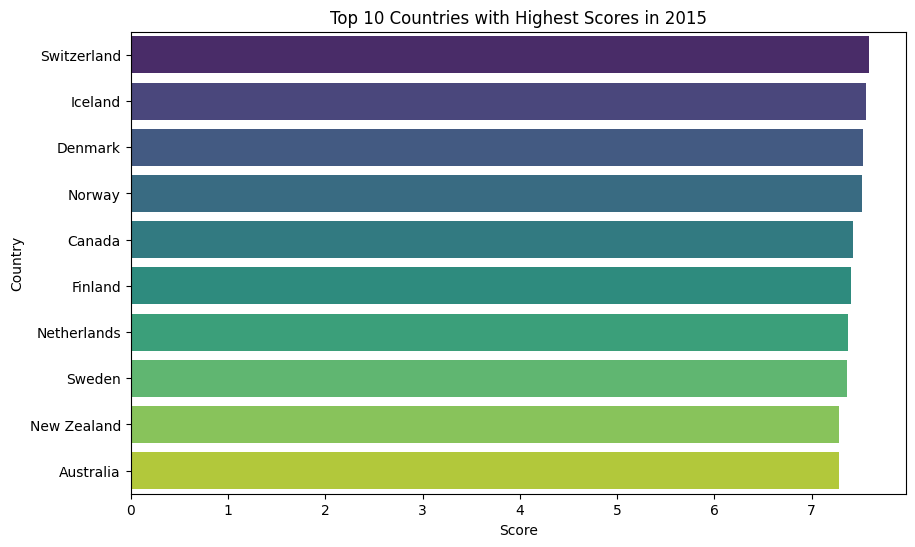

In [ ]:
# Filtra o DataFrame Happiness, para o ano escolhido
happiness_year = happiness[happiness['Year'] == 2015]

# Classifica os dados pelo Score em ordem decrescente
happiness_year_sorted = happiness_year.sort_values(by='Score', ascending=False)

# Pegar os 10 principais países para o ano escolhido
top_10_happiest_countries = happiness_year_sorted.head(10)

# Cria um gráfico de barras horizontal mostrando os 10 paises principais com maior taxa de felicidade
plt.figure(figsize=(10, 6))
sns.barplot(x='Score', y='Country', data=top_10_happiest_countries, palette='viridis')
plt.title(f'Top 10 Countries with Highest Scores in {2015}')
plt.xlabel('Score')
plt.ylabel('Country')
plt.show()

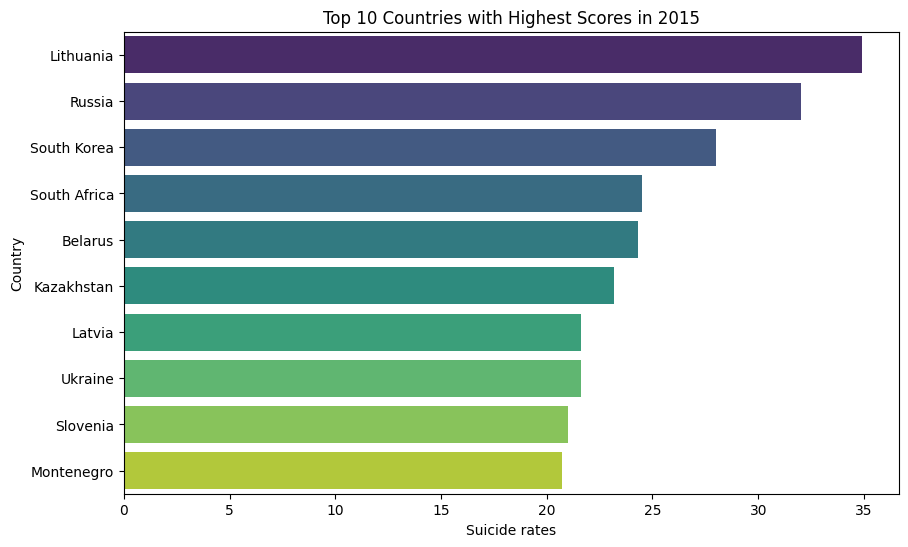

In [ ]:
# Filtra o DataFrame Suicide, para o ano escolhido
suicide_year = suicide[suicide['Year'] == 2015]

# Classifica os dados pelo Score em ordem decrescente
suicide_year_sorted = suicide_year.sort_values(by='Suicide rates (per 100 000 population) for both genres', ascending=False)

# Pegar os 10 principais países para o ano escolhido
top_10_countries = suicide_year_sorted.head(10)

# Cria um gráfico de barras horizontal mostrando os 10 paises principais com maior taxa de suicidio
plt.figure(figsize=(10, 6))
sns.barplot(x='Suicide rates (per 100 000 population) for both genres', y='Country', data=top_10_countries, palette='viridis')
plt.title(f'Top 10 Countries with Highest Scores in {2015}')
plt.xlabel('Suicide rates')
plt.ylabel('Country')
plt.show()

<Figure size 2400x1200 with 0 Axes>

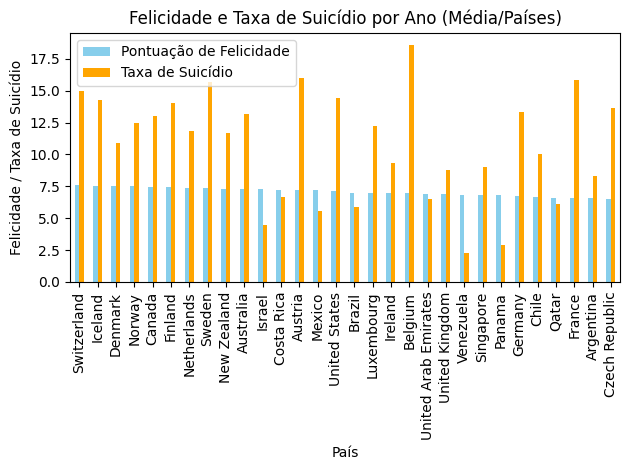

In [ ]:
# Filtrando pelo ano escolhido
merged_data_year = merged_data[merged_data['Year'] == 2015]

# Selecionando os 30 primeiros paises do ano, com base na média da pontuação de felicidade e suicidio. Usando a categoria Score, encontrada em ambos
top_30_countries = merged_data_year.nlargest(30, "Score")

# Criando o gráfico de barras agrupadas com as médias para os 30 paises
plt.figure(figsize=(24, 12))

# Agrupando os dados do ano e plotando as barras com os 30 primeiros paises com maior taxa de felicidade e suicidio
top_30_countries.plot(kind='bar', x='Country', y=['Score', 'Suicide rates (per 100 000 population) for both genres'], color=['skyblue', 'orange'])
plt.title("Felicidade e Taxa de Suicídio ao Ano (Média/Países)")
plt.xlabel("País")
plt.ylabel("Felicidade / Taxa de Suicídio")
plt.xticks(rotation=90)
plt.legend(["Pontuação de Felicidade", "Taxa de Suicídio"])
plt.tight_layout()
plt.show()


Com base em nossa EDA, conseguimos observar que os países com maior índice de felicidade também possuem o maior índice de suicídio. Isso nos leva a questionar se o fato de estarmos felizes necessariamente implica em uma menor taxa de suicídio. No entanto, é importante lembrar que correlação não implica causalidade. Ou seja, o fato de haver uma associação entre a felicidade e a taxa de suicídio não significa que um cause o outro. Existem muitos fatores complexos que podem influenciar esses resultados, e é necessária uma análise mais aprofundada para entender as relações subjacentes entre essas variáveis e identificar as causas subjacentes.